In [122]:
#import Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
#from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

In [123]:
df=pd.read_csv('final_data.csv')

In [124]:
pd.set_option('display.max_columns', None)
df.head()

,Age,DailyRate,DistanceFromHome,Education,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition_Yes,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Research & Development,Department_Sales,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,Gender_Male,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single,OverTime_Yes
0,41,1102,1,2,1,2,94,3,2,4,5993,19479,8,11,3,1,0,8,0,1,6,4,0,5,1,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1
1,49,279,8,1,2,3,61,2,2,2,5130,24907,1,23,4,4,1,10,3,3,10,7,1,7,0,1,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0
2,37,1373,2,2,4,4,92,2,1,3,2090,2396,6,15,3,2,0,7,3,3,0,0,0,0,1,0,1,1,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,1,1
3,33,1392,3,4,5,4,56,3,1,3,2909,23159,1,11,3,3,0,8,3,3,8,7,3,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1
4,27,591,2,1,7,1,40,3,1,2,3468,16632,9,12,3,4,1,6,3,3,2,2,2,2,0,0,1,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0


In [125]:
df.shape

(1470, 46)

In [126]:
#Checking duplicacy in data
len(df.EmployeeNumber.unique())

1470

In [127]:
#put everything in feature vector X except 'Employeenumber"
X= df.loc[:,df.columns!='EmployeeNumber']

#reate target variable y from attrition column
y= df['Attrition_Yes']

In [128]:
del X['Attrition_Yes']

In [129]:
#standarise the variables
scaler=StandardScaler()
scaler.fit(X,y)
scaler.transform(X,y)

c:\users\preeti saraswat\appdata\local\programs\python\python35\lib\site-packages\sklearn\preprocessing\data.py:675: DeprecationWarning: The parameter y on transform() is deprecated since 0.19 and will be removed in 0.21
  DeprecationWarning)


array([[ 0.4463504 ,  0.74252653, -1.01090934, ..., -0.91892141,
         1.45864991,  1.59174553],
       [ 1.32236521, -1.2977746 , -0.14714972, ...,  1.08823234,
        -0.68556546, -0.62824112],
       [ 0.008343  ,  1.41436324, -0.88751511, ..., -0.91892141,
         1.45864991,  1.59174553],
       ...,
       [-1.08667552, -1.60518328, -0.64072665, ...,  1.08823234,
        -0.68556546,  1.59174553],
       [ 1.32236521,  0.54667746, -0.88751511, ...,  1.08823234,
        -0.68556546, -0.62824112],
       [-0.32016256, -0.43256792, -0.14714972, ...,  1.08823234,
        -0.68556546, -0.62824112]])

In [130]:
#split the data in train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)


In [131]:
#steps = [('scaler', StandardScaler())
#        ('model',RandomForestClassifier(n_estimators = 100)),
#      ]
#pipeline = Pipeline(steps)
# Fit the pipeline to the train set
#pipeline.fit(X_train,y_train)
# Predict the labels of the test set
#y_pred = pipeline.predict(X_test)
 
# Compute metrics
#print(classification_report(y_test,y_pred))

## Using Random Forest

In [132]:
#build the classifier
model=RandomForestClassifier(n_estimators = 100)
model.fit(X_train,y_train)

#predict using model
y_pred=model.predict(X_test)

#evaluate the performance
score=accuracy_score(y_test, y_pred, normalize=True, sample_weight=None)
score

0.8724279835390947

In [133]:
print(classification_report(y_test,y_pred, labels=[1, 2, 3]))

             precision    recall  f1-score   support

          1       0.83      0.14      0.24        70
          2       0.00      0.00      0.00         0
          3       0.00      0.00      0.00         0

avg / total       0.83      0.14      0.24        70



c:\users\preeti saraswat\appdata\local\programs\python\python35\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
c:\users\preeti saraswat\appdata\local\programs\python\python35\lib\site-packages\sklearn\metrics\classification.py:1137: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


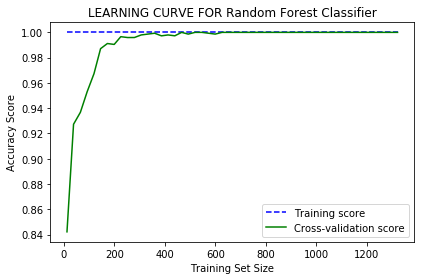

In [134]:
# Mean and Standard Deviation of training scores
mean_training = np.mean(training_scores, axis=1)
Standard_Deviation_training = np.std(training_scores, axis=1)
  
# Mean and Standard Deviation of testing scores
mean_testing = np.mean(testing_scores, axis=1)
Standard_Deviation_testing = np.std(testing_scores, axis=1)
  
# dotted blue line is for training scores and green line is for cross-validation score
plt.plot(sizes, mean_training, '--', color="b",  label="Training score")
plt.plot(sizes, mean_testing, color="g", label="Cross-validation score")
  
# Drawing plot
plt.title("LEARNING CURVE FOR Random Forest Classifier")
plt.xlabel("Training Set Size"), plt.ylabel("Accuracy Score"), plt.legend(loc="best")
plt.tight_layout()
plt.show()

In [176]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, clf.predict_proba(X_test)[:, 1])

0.7988667582417581

Hyperparameter Tuning:
    

In [135]:
#!pip install tqdm

In [169]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 10000)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'bootstrap': bootstrap,
               'max_features': max_features,
              'min_samples_leaf': min_samples_leaf}

clf = RandomizedSearchCV(estimator = model, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = None)
    # Fit the random search model
clf.fit(X_train,y_train)

   #predict using model
y_pred=clf.predict(X_test)

   #evaluate the performance
score=accuracy_score(y_test, y_pred, normalize=True, sample_weight=None)

Fitting 3 folds for each of 100 candidates, totalling 300 fits
[CV] min_samples_split=5, max_depth=90, max_features=auto, n_estimators=4140, min_samples_leaf=1, bootstrap=True 
[CV]  min_samples_split=5, max_depth=90, max_features=auto, n_estimators=4140, min_samples_leaf=1, bootstrap=True, total=  22.1s
[CV] min_samples_split=5, max_depth=90, max_features=auto, n_estimators=4140, min_samples_leaf=1, bootstrap=True 


[Parallel(n_jobs=None)]: Done   1 out of   1 | elapsed:   23.4s remaining:    0.0s


[CV]  min_samples_split=5, max_depth=90, max_features=auto, n_estimators=4140, min_samples_leaf=1, bootstrap=True, total=  20.0s
[CV] min_samples_split=5, max_depth=90, max_features=auto, n_estimators=4140, min_samples_leaf=1, bootstrap=True 
[CV]  min_samples_split=5, max_depth=90, max_features=auto, n_estimators=4140, min_samples_leaf=1, bootstrap=True, total=  20.3s
[CV] min_samples_split=10, max_depth=10, max_features=sqrt, n_estimators=2120, min_samples_leaf=4, bootstrap=True 
[CV]  min_samples_split=10, max_depth=10, max_features=sqrt, n_estimators=2120, min_samples_leaf=4, bootstrap=True, total=   9.9s
[CV] min_samples_split=10, max_depth=10, max_features=sqrt, n_estimators=2120, min_samples_leaf=4, bootstrap=True 
[CV]  min_samples_split=10, max_depth=10, max_features=sqrt, n_estimators=2120, min_samples_leaf=4, bootstrap=True, total=  10.1s
[CV] min_samples_split=10, max_depth=10, max_features=sqrt, n_estimators=2120, min_samples_leaf=4, bootstrap=True 
[CV]  min_samples_split

[CV]  min_samples_split=2, max_depth=10, max_features=sqrt, n_estimators=3938, min_samples_leaf=4, bootstrap=True, total=  18.5s
[CV] min_samples_split=5, max_depth=None, max_features=sqrt, n_estimators=6767, min_samples_leaf=2, bootstrap=True 
[CV]  min_samples_split=5, max_depth=None, max_features=sqrt, n_estimators=6767, min_samples_leaf=2, bootstrap=True, total=  32.8s
[CV] min_samples_split=5, max_depth=None, max_features=sqrt, n_estimators=6767, min_samples_leaf=2, bootstrap=True 
[CV]  min_samples_split=5, max_depth=None, max_features=sqrt, n_estimators=6767, min_samples_leaf=2, bootstrap=True, total=  37.9s
[CV] min_samples_split=5, max_depth=None, max_features=sqrt, n_estimators=6767, min_samples_leaf=2, bootstrap=True 
[CV]  min_samples_split=5, max_depth=None, max_features=sqrt, n_estimators=6767, min_samples_leaf=2, bootstrap=True, total=  35.3s
[CV] min_samples_split=2, max_depth=80, max_features=sqrt, n_estimators=10000, min_samples_leaf=2, bootstrap=True 
[CV]  min_sampl

[CV]  min_samples_split=10, max_depth=110, max_features=auto, n_estimators=4948, min_samples_leaf=2, bootstrap=True, total=  22.9s
[CV] min_samples_split=10, max_depth=110, max_features=auto, n_estimators=4948, min_samples_leaf=2, bootstrap=True 
[CV]  min_samples_split=10, max_depth=110, max_features=auto, n_estimators=4948, min_samples_leaf=2, bootstrap=True, total=  23.3s
[CV] min_samples_split=10, max_depth=110, max_features=auto, n_estimators=4948, min_samples_leaf=2, bootstrap=True 
[CV]  min_samples_split=10, max_depth=110, max_features=auto, n_estimators=4948, min_samples_leaf=2, bootstrap=True, total=  23.3s
[CV] min_samples_split=2, max_depth=30, max_features=sqrt, n_estimators=1716, min_samples_leaf=4, bootstrap=True 
[CV]  min_samples_split=2, max_depth=30, max_features=sqrt, n_estimators=1716, min_samples_leaf=4, bootstrap=True, total=   7.8s
[CV] min_samples_split=2, max_depth=30, max_features=sqrt, n_estimators=1716, min_samples_leaf=4, bootstrap=True 
[CV]  min_samples_

[CV]  min_samples_split=5, max_depth=30, max_features=auto, n_estimators=10000, min_samples_leaf=1, bootstrap=True, total=  51.4s
[CV] min_samples_split=5, max_depth=30, max_features=auto, n_estimators=10000, min_samples_leaf=1, bootstrap=True 
[CV]  min_samples_split=5, max_depth=30, max_features=auto, n_estimators=10000, min_samples_leaf=1, bootstrap=True, total=  49.4s
[CV] min_samples_split=5, max_depth=90, max_features=sqrt, n_estimators=6969, min_samples_leaf=1, bootstrap=True 
[CV]  min_samples_split=5, max_depth=90, max_features=sqrt, n_estimators=6969, min_samples_leaf=1, bootstrap=True, total=  33.3s
[CV] min_samples_split=5, max_depth=90, max_features=sqrt, n_estimators=6969, min_samples_leaf=1, bootstrap=True 
[CV]  min_samples_split=5, max_depth=90, max_features=sqrt, n_estimators=6969, min_samples_leaf=1, bootstrap=True, total=  33.4s
[CV] min_samples_split=5, max_depth=90, max_features=sqrt, n_estimators=6969, min_samples_leaf=1, bootstrap=True 
[CV]  min_samples_split=5

[CV]  min_samples_split=5, max_depth=None, max_features=auto, n_estimators=706, min_samples_leaf=4, bootstrap=True, total=   3.4s
[CV] min_samples_split=2, max_depth=100, max_features=auto, n_estimators=6767, min_samples_leaf=4, bootstrap=True 
[CV]  min_samples_split=2, max_depth=100, max_features=auto, n_estimators=6767, min_samples_leaf=4, bootstrap=True, total=  31.9s
[CV] min_samples_split=2, max_depth=100, max_features=auto, n_estimators=6767, min_samples_leaf=4, bootstrap=True 
[CV]  min_samples_split=2, max_depth=100, max_features=auto, n_estimators=6767, min_samples_leaf=4, bootstrap=True, total=  34.2s
[CV] min_samples_split=2, max_depth=100, max_features=auto, n_estimators=6767, min_samples_leaf=4, bootstrap=True 
[CV]  min_samples_split=2, max_depth=100, max_features=auto, n_estimators=6767, min_samples_leaf=4, bootstrap=True, total=  32.1s
[CV] min_samples_split=2, max_depth=None, max_features=auto, n_estimators=6767, min_samples_leaf=4, bootstrap=True 
[CV]  min_samples_s

[CV]  min_samples_split=2, max_depth=10, max_features=sqrt, n_estimators=5151, min_samples_leaf=4, bootstrap=True, total=  10.2s
[CV] min_samples_split=2, max_depth=10, max_features=sqrt, n_estimators=5151, min_samples_leaf=4, bootstrap=True 
[CV]  min_samples_split=2, max_depth=10, max_features=sqrt, n_estimators=5151, min_samples_leaf=4, bootstrap=True, total=  10.4s
[CV] min_samples_split=2, max_depth=10, max_features=sqrt, n_estimators=5151, min_samples_leaf=4, bootstrap=True 
[CV]  min_samples_split=2, max_depth=10, max_features=sqrt, n_estimators=5151, min_samples_leaf=4, bootstrap=True, total=  10.7s
[CV] min_samples_split=10, max_depth=100, max_features=auto, n_estimators=5353, min_samples_leaf=1, bootstrap=True 
[CV]  min_samples_split=10, max_depth=100, max_features=auto, n_estimators=5353, min_samples_leaf=1, bootstrap=True, total=  16.0s
[CV] min_samples_split=10, max_depth=100, max_features=auto, n_estimators=5353, min_samples_leaf=1, bootstrap=True 
[CV]  min_samples_spli

[CV]  min_samples_split=5, max_depth=110, max_features=sqrt, n_estimators=8585, min_samples_leaf=2, bootstrap=True, total=  17.2s
[CV] min_samples_split=5, max_depth=110, max_features=sqrt, n_estimators=8585, min_samples_leaf=2, bootstrap=True 
[CV]  min_samples_split=5, max_depth=110, max_features=sqrt, n_estimators=8585, min_samples_leaf=2, bootstrap=True, total=  17.6s
[CV] min_samples_split=10, max_depth=80, max_features=sqrt, n_estimators=4746, min_samples_leaf=1, bootstrap=True 
[CV]  min_samples_split=10, max_depth=80, max_features=sqrt, n_estimators=4746, min_samples_leaf=1, bootstrap=True, total=   9.4s
[CV] min_samples_split=10, max_depth=80, max_features=sqrt, n_estimators=4746, min_samples_leaf=1, bootstrap=True 
[CV]  min_samples_split=10, max_depth=80, max_features=sqrt, n_estimators=4746, min_samples_leaf=1, bootstrap=True, total=   9.0s
[CV] min_samples_split=10, max_depth=80, max_features=sqrt, n_estimators=4746, min_samples_leaf=1, bootstrap=True 
[CV]  min_samples_sp

[CV]  min_samples_split=10, max_depth=80, max_features=auto, n_estimators=7979, min_samples_leaf=1, bootstrap=True, total=  16.1s
[CV] min_samples_split=5, max_depth=90, max_features=sqrt, n_estimators=8585, min_samples_leaf=2, bootstrap=True 
[CV]  min_samples_split=5, max_depth=90, max_features=sqrt, n_estimators=8585, min_samples_leaf=2, bootstrap=True, total=  16.4s
[CV] min_samples_split=5, max_depth=90, max_features=sqrt, n_estimators=8585, min_samples_leaf=2, bootstrap=True 
[CV]  min_samples_split=5, max_depth=90, max_features=sqrt, n_estimators=8585, min_samples_leaf=2, bootstrap=True, total=  16.8s
[CV] min_samples_split=5, max_depth=90, max_features=sqrt, n_estimators=8585, min_samples_leaf=2, bootstrap=True 
[CV]  min_samples_split=5, max_depth=90, max_features=sqrt, n_estimators=8585, min_samples_leaf=2, bootstrap=True, total=  17.1s
[CV] min_samples_split=10, max_depth=80, max_features=sqrt, n_estimators=2726, min_samples_leaf=1, bootstrap=True 
[CV]  min_samples_split=10

[CV]  min_samples_split=2, max_depth=90, max_features=auto, n_estimators=1716, min_samples_leaf=1, bootstrap=True, total=   8.4s
[CV] min_samples_split=2, max_depth=90, max_features=auto, n_estimators=1716, min_samples_leaf=1, bootstrap=True 
[CV]  min_samples_split=2, max_depth=90, max_features=auto, n_estimators=1716, min_samples_leaf=1, bootstrap=True, total=   8.6s
[CV] min_samples_split=2, max_depth=90, max_features=auto, n_estimators=1716, min_samples_leaf=1, bootstrap=True 
[CV]  min_samples_split=2, max_depth=90, max_features=auto, n_estimators=1716, min_samples_leaf=1, bootstrap=True, total=   8.4s
[CV] min_samples_split=2, max_depth=60, max_features=sqrt, n_estimators=5353, min_samples_leaf=4, bootstrap=True 
[CV]  min_samples_split=2, max_depth=60, max_features=sqrt, n_estimators=5353, min_samples_leaf=4, bootstrap=True, total=  26.0s
[CV] min_samples_split=2, max_depth=60, max_features=sqrt, n_estimators=5353, min_samples_leaf=4, bootstrap=True 
[CV]  min_samples_split=2, m

[Parallel(n_jobs=None)]: Done 300 out of 300 | elapsed: 213.2min finished


In [170]:
print(clf.best_params_)


{'min_samples_split': 2, 'max_depth': 100, 'max_features': 'sqrt', 'n_estimators': 4342, 'min_samples_leaf': 1, 'bootstrap': True}


In [171]:
print(clf.best_score_)

0.8516260162601627


In [183]:
RandomForestModel= RandomForestClassifier(n_estimators=4342, max_depth=100, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features='sqrt', max_leaf_nodes=None, min_impurity_decrease=0.0, min_impurity_split=None, bootstrap=True)
RandomForestModel.fit(X_train,y_train)

   #predict using model
y_pred=RandomForestModel.predict(X_test)
features_importance = RandomForestModel.feature_importances_
imp_features=[]
 
print("Feature ranking:")
for i, data_class in enumerate(X.columns):
    print("{}. {} ({})".format(i + 1, data_class, features_importance[i]))
    imp_features.append((i + 1, data_class, features_importance[i]))

Feature ranking:
1. Age (0.05988847040730869)
2. DailyRate (0.049298390908527744)
3. DistanceFromHome (0.045183942488315816)
4. Education (0.01945313388604089)
5. EnvironmentSatisfaction (0.02514403501778785)
6. HourlyRate (0.04501517325065439)
7. JobInvolvement (0.02314575055845716)
8. JobLevel (0.019167421576604036)
9. JobSatisfaction (0.024307329273967452)
10. MonthlyIncome (0.07578271196087474)
11. MonthlyRate (0.04763337126417558)
12. NumCompaniesWorked (0.03711217594949667)
13. PercentSalaryHike (0.03317999183602639)
14. PerformanceRating (0.0046023333169749065)
15. RelationshipSatisfaction (0.023256730982264086)
16. StockOptionLevel (0.03138904622286633)
17. TotalWorkingYears (0.05099708629165867)
18. TrainingTimesLastYear (0.026129953710201173)
19. WorkLifeBalance (0.02015018905540577)
20. YearsAtCompany (0.04180079410033298)
21. YearsInCurrentRole (0.031143866707609814)
22. YearsSinceLastPromotion (0.024392371459546747)
23. YearsWithCurrManager (0.033540606566684124)
24. Busin

In [190]:
imp_features.sort(reverse=True)
imp_features[:25]

[(44, 'OverTime_Yes', 0.05265691806627671),
 (43, 'MaritalStatus_Single', 0.022133027953885248),
 (42, 'MaritalStatus_Married', 0.007741567972110167),
 (41, 'JobRole_Sales Representative', 0.009442143756342702),
 (40, 'JobRole_Sales Executive', 0.006982511928536768),
 (39, 'JobRole_Research Scientist', 0.0065205178594668475),
 (38, 'JobRole_Research Director', 0.0009879775515702271),
 (37, 'JobRole_Manufacturing Director', 0.0027888066249858734),
 (36, 'JobRole_Manager', 0.0012279263691265983),
 (35, 'JobRole_Laboratory Technician', 0.00889099269370487),
 (34, 'JobRole_Human Resources', 0.0033989847847188353),
 (33, 'Gender_Male', 0.009419791218145982),
 (32, 'EducationField_Technical Degree', 0.00956722396286529),
 (31, 'EducationField_Other', 0.00363118516657585),
 (30, 'EducationField_Medical', 0.008299397857781405),
 (29, 'EducationField_Marketing', 0.007233379421285697),
 (28, 'EducationField_Life Sciences', 0.0079516809997849),
 (27, 'Department_Sales', 0.00921384564428427),
 (26

In [187]:
print(classification_report(y_test,y_pred, labels=[1, 2, 3]))

             precision    recall  f1-score   support

          1       0.82      0.13      0.22        70
          2       0.00      0.00      0.00         0
          3       0.00      0.00      0.00         0

avg / total       0.82      0.13      0.22        70



c:\users\preeti saraswat\appdata\local\programs\python\python35\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
c:\users\preeti saraswat\appdata\local\programs\python\python35\lib\site-packages\sklearn\metrics\classification.py:1137: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


In [40]:
#using cross validation and learning curve
from sklearn.model_selection import learning_curve
sizes, training_scores, testing_scores = learning_curve(RandomForestClassifier(n_estimators = 100), X, y, cv=10, scoring='accuracy', train_sizes=np.linspace(0.01, 1.0, 50))

From the curve, we can clearly see that as the size of the training set increases, the training score curve and the cross-validation score curve converge. The cross-validation accuracy increases as we add more training data. So adding training data is useful in this case. Since the training score is very accurate, this indicates low bias and high variance. So this model also begins overfitting the data because the cross-validation score is relatively lower and increases very slowly as the size of the training set increases.



## using SVM

In [156]:
#using support vector machine for classification
#using cross validation and learning curve
from sklearn.svm import SVC
from sklearn.model_selection import learning_curve
sizes, training_scores, testing_scores = learning_curve(SVC(), X, y, cv=10, scoring='accuracy', train_sizes=np.linspace(0.01, 1.0, 50))

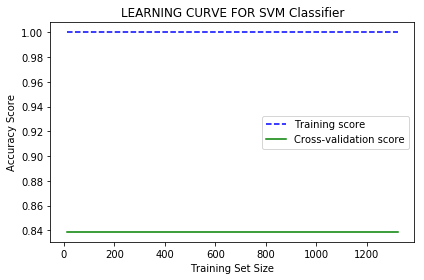

In [157]:
# Mean and Standard Deviation of training scores
mean_training = np.mean(training_scores, axis=1)
Standard_Deviation_training = np.std(training_scores, axis=1)
  
# Mean and Standard Deviation of testing scores
mean_testing = np.mean(testing_scores, axis=1)
Standard_Deviation_testing = np.std(testing_scores, axis=1)
  
# dotted blue line is for training scores and green line is for cross-validation score
plt.plot(sizes, mean_training, '--', color="b",  label="Training score")
plt.plot(sizes, mean_testing, color="g", label="Cross-validation score")
  
# Drawing plot
plt.title("LEARNING CURVE FOR SVM Classifier")
plt.xlabel("Training Set Size"), plt.ylabel("Accuracy Score"), plt.legend(loc="best")
plt.tight_layout()
plt.show()

In [158]:
#build the classifier
model1=SVC()
model1.fit(X_train,y_train)

#predict using model
y_pred=model1.predict(X_test)

In [153]:
#evaluate the performance
score=accuracy_score(y_test, y_pred, normalize=True, sample_weight=None)
score

0.8559670781893004

In [154]:
print(classification_report(y_test,y_pred, labels=[1, 2, 3]))

             precision    recall  f1-score   support

          1       0.00      0.00      0.00        70
          2       0.00      0.00      0.00         0
          3       0.00      0.00      0.00         0

avg / total       0.00      0.00      0.00        70



c:\users\preeti saraswat\appdata\local\programs\python\python35\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
c:\users\preeti saraswat\appdata\local\programs\python\python35\lib\site-packages\sklearn\metrics\classification.py:1137: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


In [155]:
GridSearchCV(estimator=SVC(),
             param_grid={'C': [1, 10], 'kernel': ('linear', 'rbf')})

GridSearchCV(cv=None, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': [1, 10], 'kernel': ('linear', 'rbf')},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

## Save the Model

In [22]:
import pickle
filename = 'final_model.sav'
pickle.dump(model, open(filename, 'wb'))
 
 
# load the model from disk for later use
#loaded_model = pickle.load(open(filename, 'rb'))
#result = loaded_model.score(X_test, Y_test)
#print(result)